In [42]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [43]:
df = pd.read_csv("audi.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


### check the number of unique values in the 'model' column

In [44]:
print(df['model'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


### data filtering

In [45]:
df_R8 = df[df['model'] == ' R8']

display(df_R8)
print(df_R8.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
1646,R8,2019,129000,Semi-Auto,4000,Petrol,21.4,5.2
1869,R8,2013,47995,Manual,19834,Petrol,19.6,4.2
2255,R8,2020,137995,Semi-Auto,70,Petrol,21.1,5.2
3359,R8,2019,125000,Automatic,100,Petrol,24.1,5.2
3367,R8,2019,135000,Automatic,1000,Petrol,32.8,5.2
3939,R8,2019,112990,Automatic,8175,Petrol,21.6,5.2
4179,R8,2019,137500,Semi-Auto,10,Petrol,21.4,5.2
4391,R8,2018,93950,Semi-Auto,3800,Petrol,23.0,5.2
4742,R8,2019,117990,Automatic,11936,Petrol,21.4,5.2
4783,R8,2020,145000,Semi-Auto,2000,Petrol,21.1,5.2


(28, 8)


In [46]:
# find the average price of the ' M6' model cars
df_R8['price'].sum()/28

97652.21428571429

## Data Aggregation

In [47]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


### Data preprocessing before visualization

In [48]:
# sort the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# remove the 'count' column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType

Questions in mind: Based on model, transmission and fuelType,
What are the top 5 selling car models in the dataset?
What's the average selling price of the top 5 selling car models?
What's the total sale of the top 5 selling car models?

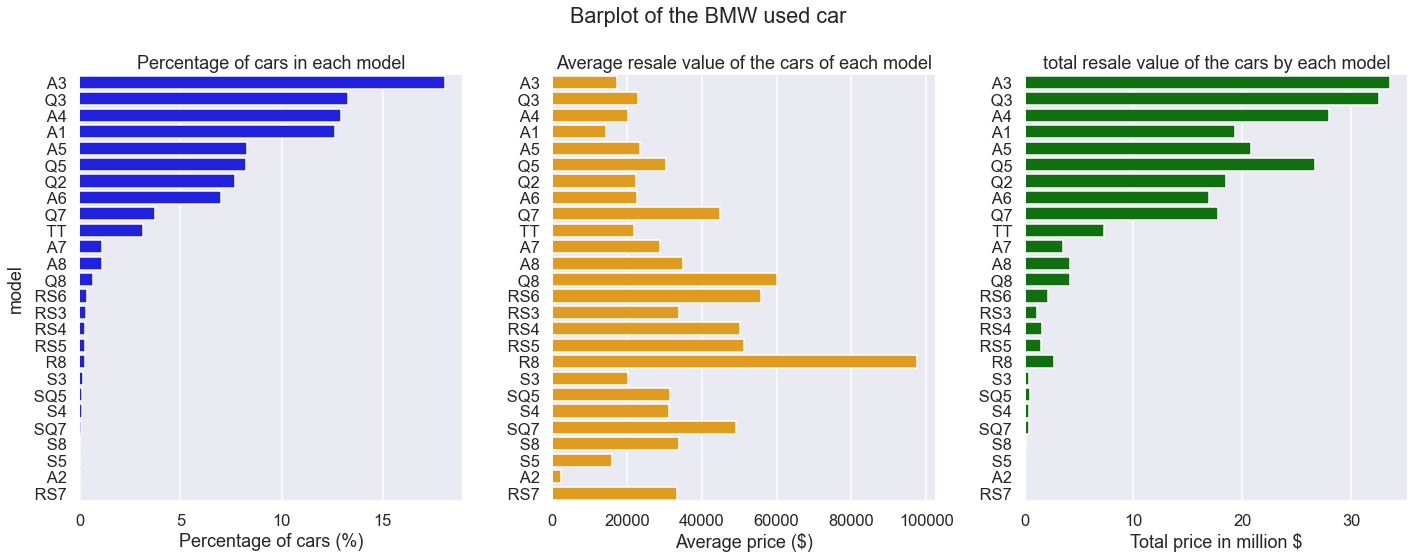

In [49]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the BMW used car")
plt.tight_layout()
plt.show()

## Create a pivot table

In [50]:
df_pivot = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
